### READ_ADECK

Reads in A-Deck file from NHC, extracts track information, and plots track
##### Brian Tang, 11/19/15

In [1]:
%pylab inline

import numpy as N
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


User defined variables

In [2]:
filein = 'aal112015.dat'
dateselect = 2015100200
modelselect = 'AVNO'

Read in data from A-Deck file

In [3]:
date, model, tau, latNS, lonEW = N.genfromtxt(filein, delimiter=',', autostrip=True, usecols=(2,4,5,6,7), unpack=True, dtype='S')
date = date.astype(int)
tau = tau.astype(int)

In [4]:
#handle longitude and latitude
lat = N.zeros(N.size(latNS))
lon = N.zeros(N.size(lonEW))
for i in xrange(N.size(latNS)):
    if latNS[i][-1]=='N':
        lat[i] = float(latNS[i][0:-1])/10.
    elif latNS[i][-1]=='S':
        lat[i] = -float(latNS[i][0:-1])/10.
        
    if lonEW[i][-1]=='E':
        lon[i] = float(lonEW[i][0:-1])/10.
    elif lonEW[i][-1]=='W':
        lon[i] = -float(lonEW[i][0:-1])/10.

Find rows that correspond to selected date and model

In [5]:
rowi = N.nonzero((date==dateselect)&(model==modelselect))[0]
stormtau = tau[rowi]
stormlat = lat[rowi]
stormlon = lon[rowi]

Eliminate redundant rows

In [6]:
stormtauU, indx = N.unique(stormtau,return_index=True)
stormlatU = stormlat[indx]
stormlonU = stormlon[indx]

Plot

/Users/btang/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


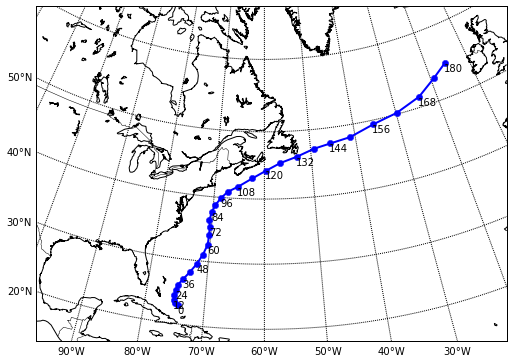

In [7]:
plt.figure(figsize=(10,6))
m = Basemap(llcrnrlon=stormlonU.min()-20.,llcrnrlat=stormlatU.min()-10.,urcrnrlon=stormlonU.max()+20.,urcrnrlat=stormlatU.max()+3.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,resolution ='l',area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
x, y = m(stormlonU, stormlatU)
m.plot(x,y,lw=2)
m.plot(x,y,'b.',ms=12)
for i in N.arange(0,N.size(stormtauU),2):
    plt.text(x[i],y[i],stormtauU[i],va='top')
plt.show()